Price of house:  958942.1397316228
Price of house:  990966.3289145579


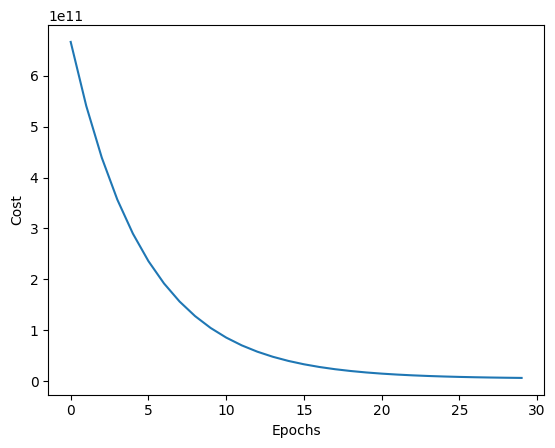

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#import data
data = pd.read_csv("USA_Housing.csv")
data.drop('Address',axis= 1, inplace =True)

#split data
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']


df = pd.DataFrame()

#preprocessing

#normalization
for i in range(0,5):
    col = X.columns[i]
    mean = X[col].mean()
    std =X[col].std()
     
    def standard(x):
        return (x-mean)/std
    
    df[col] = X[col].apply(standard)
    
    
x = np.array(df)
y = np.array(y)

x = np.hstack((np.ones((x.shape[0],1)), x))
y = np.reshape(y, (5000,1))

#initial theta values
theta = np.zeros((x.shape[1], 1))

#hypothesis
def hypo(x, theta):
    return np.matmul(x, theta)

#cost function
def cost_fn(x,y, theta):
    return (hypo(x, theta) - y).T@(hypo(x, theta) - y)/(2*x.shape[0])

#gradient descent
def grad_d(x,y,theta,alpha=0.1 ,epochs=10):
    m = x.shape[0]
    cost = []
    
    for i in range(epochs):
        h_x   = hypo(x , theta)
        error = (1/m)*(x.T@(h_x - y))
        theta = theta - (alpha)*error
        cost.append(cost_fn(x,y,theta))
    
    return theta , cost


#function to plot cost
def pl_cost(J, epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(epochs, J)

    
#optimization
theta, cost = grad_d(x, y, theta , alpha= 0.1 , epochs = 30)


epochs = []
z = []
count = 0
for i in cost:
    z.append(i[0][0])
    epochs.append(count)
    count += 1
z = np.array(z)
epochs = np.array(epochs)
pl_cost(z, epochs)


#Testing new sample
sample= data.sample()
sample.drop('Price',axis=1,inplace=True)


for i in range(0,5):
    col = X.columns[i]
    mean = X[col].mean()
    std =X[col].std()
    
    sample_col = sample.columns[i]
     
    def standard(x):
        return (x-mean)/std
    
    sample[sample_col] = sample[sample_col].apply(standard)
        
sample = np.array(sample)
sample[0][0] = 1

result = theta[0] + theta[1]*sample[0][1] + theta[2]*sample[0][2] + theta[3]*sample[0][3]+ theta[4]*sample[0][4]
print("Price of house: ", result[0])


# The normal Equation
theta_normal = (np.linalg.inv(x.T@x))@(x.T)@(y)

result_normal = theta_normal[0] + theta_normal[1]*sample[0][1] + theta_normal[2]*sample[0][2] + theta_normal[3]*sample[0][3]+ theta_normal[4]*sample[0][4]
print("Price of house: ", result_normal[0])
